In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from utils.generate import GenerateData
from utils.generate import GenerateData_binomial

# $P_{peak}(Z|X)$

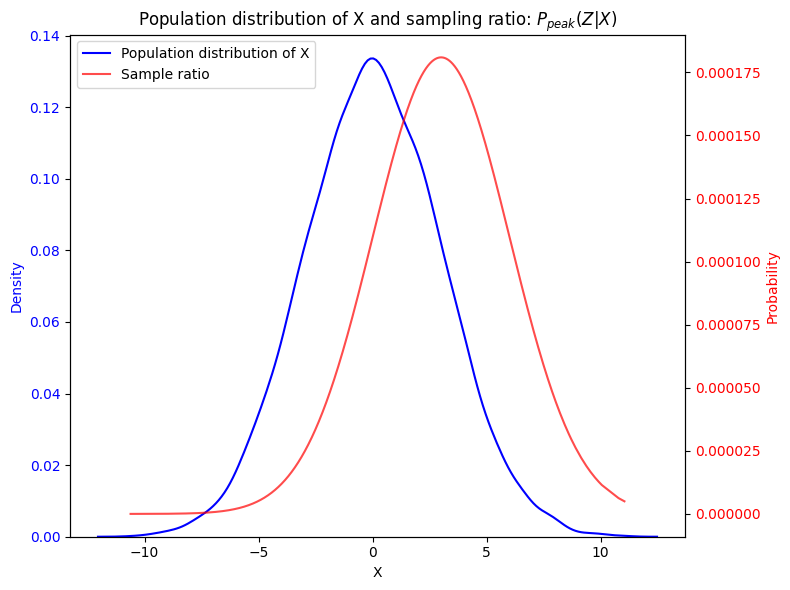

In [4]:
# 特徴量の数を設定
n_features = 1

# 特徴量の平均と標準偏差を設定
X_mu = [0]
X_sigma = [3]

# パラメータの平均と標準偏差を設定
beta_mu = [-2,4]
beta_sigma = [0.5,0.5]

# クラスをインスタンス化
generator = GenerateData_binomial(
    n_features=n_features,
    X_mu_list=X_mu,
    X_sigma_list=X_sigma,
    beta_mu=beta_mu, # beta_mu_matrixをbeta_muに変更
    beta_sigma=beta_sigma # beta_sigma_matrixをbeta_sigmaに変更
)

X, y = generator.generate_non_bias_data()

threshfold = 3
X_bias, y_bias, probs = generator.generate_bias_data(n_samples=100, X_features_bias= 1 , threshfold= threshfold, sample_type="norm")

df_X = pd.DataFrame(X[:,1])
df_X["prob"] = probs
df_X.columns = ["X","prob"]
df_X.sort_values(by="X",inplace=True)

fig, ax1 = plt.subplots(figsize=(8,6))

# ax1にkdeplotを描画
sns.kdeplot(data=df_X, x="X", ax=ax1, color='blue')
ax1.set_xlabel("X")
ax1.set_ylabel("Density", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 同じ図に別軸を作成
ax2 = ax1.twinx()

# ax2にX vs probのプロットを描画
line2, = ax2.plot(df_X["X"], df_X["prob"], color='red', alpha=0.7)
ax2.set_ylabel("Probability", color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title("Population distribution of X and sampling ratio: $P_{peak}(Z|X)$")

# kdeplotで描画されたラインはax1に保存されている
line1 = ax1.lines[0]

# 凡例を表示(一つの凡例にまとめる場合)
# handles: 対象となるラインオブジェクト
# labels:  それぞれのラインのラベル
lines = [line1, line2]
labels = ['Population distribution of X', 'Sample ratio']
ax1.legend(lines, labels, loc='upper left')

plt.tight_layout()
plt.show()


# $P_{prop}(Z|X)$

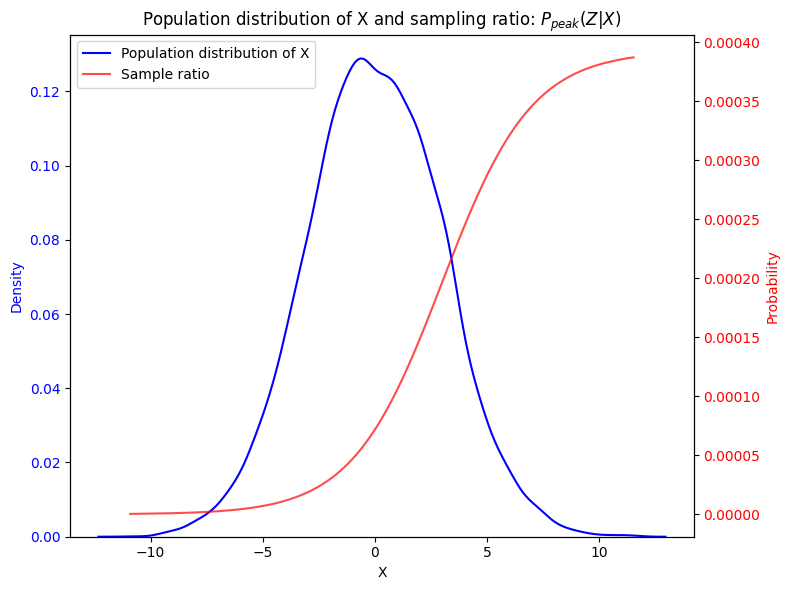

In [2]:
# 特徴量の数を設定
n_features = 1

# 特徴量の平均と標準偏差を設定
X_mu = [0]
X_sigma = [3]

# パラメータの平均と標準偏差を設定
beta_mu = [-2,4]
beta_sigma = [0.5,0.5]

# クラスをインスタンス化
generator = GenerateData_binomial(
    n_features=n_features,
    X_mu_list=X_mu,
    X_sigma_list=X_sigma,
    beta_mu=beta_mu, # beta_mu_matrixをbeta_muに変更
    beta_sigma=beta_sigma # beta_sigma_matrixをbeta_sigmaに変更
)

X, y = generator.generate_non_bias_data()

threshfold = 3
X_bias, y_bias, probs = generator.generate_bias_data(n_samples=100, X_features_bias= 1 , threshfold= threshfold, sample_type="prop")

df_X = pd.DataFrame(X[:,1])
df_X["prob"] = probs
df_X.columns = ["X","prob"]
df_X.sort_values(by="X",inplace=True)

fig, ax1 = plt.subplots(figsize=(8,6))

# ax1にkdeplotを描画
sns.kdeplot(data=df_X, x="X", ax=ax1, color='blue')
ax1.set_xlabel("X")
ax1.set_ylabel("Density", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 同じ図に別軸を作成
ax2 = ax1.twinx()

# ax2にX vs probのプロットを描画
line2, = ax2.plot(df_X["X"], df_X["prob"], color='red', alpha=0.7)
ax2.set_ylabel("Probability", color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title("Population distribution of X and sampling ratio: $P_{prop}(Z|X)$")

# kdeplotで描画されたラインはax1に保存されている
line1 = ax1.lines[0]

# 凡例を表示(一つの凡例にまとめる場合)
# handles: 対象となるラインオブジェクト
# labels:  それぞれのラインのラベル
lines = [line1, line2]
labels = ['Population distribution of X', 'Sample ratio']
ax1.legend(lines, labels, loc='upper left')

plt.tight_layout()
plt.show()
